### Universidad del Valle de Guatemala
### Deep Learning
### Laboratorio 8
### Andres Quezada y Javier Chavez

#### Inciso A

In [6]:
import gensim
import re
import nltk
from nltk.corpus import stopwords

# Descargar stopwords de NLTK

nltk.download('stopwords')

with open('./data/reviews_data.txt', 'r', encoding='latin-1') as file:
    documents = file.readlines()

# Definir las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Preprocesamiento mejorado: quitar puntuación, números y palabras vacías
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Eliminar caracteres no alfabéticos
    words = text.lower().split()  # Convertir a minúsculas y dividir en palabras
    words = [word for word in words if word not in stop_words]  # Eliminar stopwords
    return words

# Aplicar preprocesamiento a cada documento
documents = [preprocess(doc) for doc in documents]

# Crear modelo Word2Vec con parámetros ajustados
model = gensim.models.Word2Vec(
    documents,
    vector_size=100,
    window=5,
    min_count=2,
    workers=10
)

# Entrenar el modelo durante 8 épocas
for epoch in range(8):
    model.train(documents, total_examples=len(documents), epochs=1)
    print(f'Epoch {epoch+1} completed.')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andres/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Epoch 6 completed.
Epoch 7 completed.
Epoch 8 completed.


#### Inciso B

In [7]:
# Palabras a buscar en el modelo
target_words = ["street", "good", "dog", "mother", "bed"]

# Aplicar la función most_similar para cada palabra
for word in target_words:
    try:
        similar_words = model.wv.most_similar(word, topn=10)
        print(f"Palabras similares a '{word}':")
        for similar_word, similarity in similar_words:
            print(f"  {similar_word}: {similarity:.4f}")
        print("\n")
    except KeyError:
        print(f"La palabra '{word}' no está en el vocabulario del modelo.\n")


Palabras similares a 'street':
  road: 0.8793
  streetthe: 0.8392
  steet: 0.8368
  streetwe: 0.8208
  roadthe: 0.7958
  stree: 0.7928
  streeti: 0.7865
  streetit: 0.7727
  intersection: 0.7676
  streeta: 0.7505


Palabras similares a 'good':
  decent: 0.8450
  great: 0.8207
  excellent: 0.7793
  terrific: 0.6776
  exellent: 0.6669
  excellant: 0.6519
  reasonable: 0.6512
  soso: 0.6433
  goodthe: 0.6418
  excelent: 0.6416


Palabras similares a 'dog':
  dogs: 0.8193
  kid: 0.5708
  pet: 0.5687
  babies: 0.5609
  babys: 0.5434
  pets: 0.5372
  kids: 0.5301
  inflatable: 0.5240
  child: 0.5211
  children: 0.5145


Palabras similares a 'mother':
  father: 0.8791
  daughter: 0.8608
  mom: 0.8432
  wife: 0.8387
  husband: 0.8325
  mum: 0.8294
  brother: 0.8247
  son: 0.8228
  cousin: 0.8214
  daughters: 0.8207


Palabras similares a 'bed':
  beds: 0.8869
  bedthe: 0.8618
  bedi: 0.7654
  daybed: 0.7610
  bedwe: 0.7289
  sofabed: 0.7217
  bedsthe: 0.7040
  bedthat: 0.6985
  hideabed: 0.683

#### Inciso C

In [8]:
# Lista para almacenar las 55 palabras (iniciales + similares)
embedding_words = []

# Palabras iniciales
target_words = ["street", "good", "dog", "mother", "bed"]

# Obtener las 10 palabras más similares para cada palabra inicial
for word in target_words:
    try:
        # Agregar la palabra inicial a la lista
        embedding_words.append(word)
        
        # Obtener las palabras similares
        similar_words = model.wv.most_similar(word, topn=10)
        
        # Agregar las palabras similares a la lista
        for similar_word, _ in similar_words:
            embedding_words.append(similar_word)
    
    except KeyError:
        print(f"La palabra '{word}' no está en el vocabulario del modelo.")

# Extraer los embeddings de estas palabras
word_embeddings = {}
for word in embedding_words:
    try:
        # Extraer el vector de embeddings de la palabra
        word_embeddings[word] = model.wv[word]
    except KeyError:
        print(f"No se encontró la palabra '{word}' en el vocabulario del modelo.")

# Mostrar las primeras palabras y sus embeddings (opcional)
for word, embedding in list(word_embeddings.items())[:5]:
    print(f"Palabra: {word}, Embedding: {embedding[:5]}... (truncated)")


Palabra: street, Embedding: [ 3.760018   2.1485655 -3.0300589  2.0634162  1.9304447]... (truncated)
Palabra: road, Embedding: [ 2.8664591   0.12245713 -2.4775164   2.880837    0.88593334]... (truncated)
Palabra: streetthe, Embedding: [ 2.6822388  2.2242584 -2.430243   3.0168436  2.365246 ]... (truncated)
Palabra: steet, Embedding: [ 1.1079963   0.43831077 -0.45958522  1.1204469   0.32989192]... (truncated)
Palabra: streetwe, Embedding: [ 1.5599853   1.0685058  -1.8893888   0.56750023  0.7729391 ]... (truncated)


#### Inciso D

In [9]:
from sklearn.decomposition import PCA
import numpy as np

# Asegurarnos de que tenemos los embeddings de las 55 palabras
embeddings_matrix = np.array([word_embeddings[word] for word in embedding_words])

# Aplicar PCA para reducir los embeddings a 2 dimensiones
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

# Mostrar los resultados reducidos
for i, word in enumerate(embedding_words):
    print(f"Palabra: {word}, PCA1: {reduced_embeddings[i, 0]}, PCA2: {reduced_embeddings[i, 1]}")


Palabra: street, PCA1: 10.097508430480957, PCA2: 6.599677085876465
Palabra: road, PCA1: 9.4938383102417, PCA2: 5.3011860847473145
Palabra: streetthe, PCA1: 10.315581321716309, PCA2: 4.643979549407959
Palabra: steet, PCA1: 4.2848968505859375, PCA2: 0.9900001287460327
Palabra: streetwe, PCA1: 4.352272987365723, PCA2: 1.3233652114868164
Palabra: roadthe, PCA1: 5.887058258056641, PCA2: 1.5777969360351562
Palabra: stree, PCA1: 3.3384788036346436, PCA2: 0.7086474895477295
Palabra: streeti, PCA1: 4.922153949737549, PCA2: 2.2351508140563965
Palabra: streetit, PCA1: 3.274874448776245, PCA2: 0.6968246102333069
Palabra: intersection, PCA1: 7.387562274932861, PCA2: 3.5897340774536133
Palabra: streeta, PCA1: 3.1544792652130127, PCA2: 0.6055595874786377
Palabra: good, PCA1: 6.983852386474609, PCA2: -7.507494926452637
Palabra: decent, PCA1: 6.650775909423828, PCA2: -5.234968185424805
Palabra: great, PCA1: 5.513326644897461, PCA2: -7.709993362426758
Palabra: excellent, PCA1: 6.544302940368652, PCA2: -

#### Inciso E

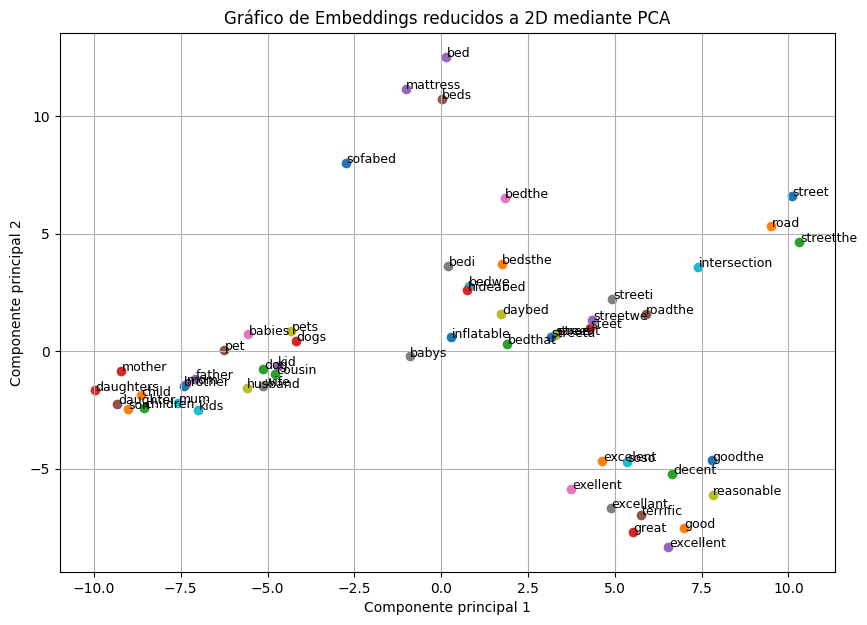

In [10]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 7))

# Graficar cada palabra en su nueva posición 2D
for i, word in enumerate(embedding_words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], marker='o')
    plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1], word, fontsize=9)

# Configurar el gráfico
plt.title('Gráfico de Embeddings reducidos a 2D mediante PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.show()
